## Solido con parametri $\rho = 1.1 \,, T = 0.8$

### autocorrelazione

Abbiamo $t_{max} = 10^5$ step ed andiamo a prendere in esame un intervallo per $t \in [0, 200]$: riusciamo così ad osservare il decadimento.

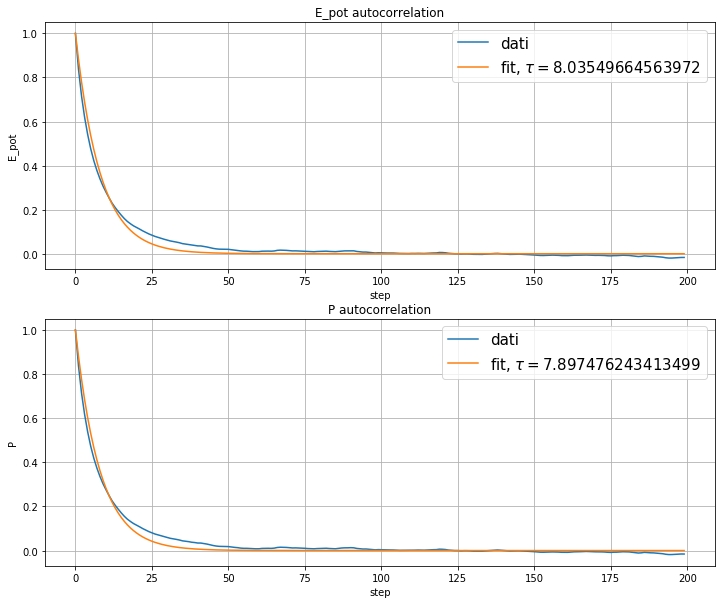

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def fe(x, a):
    return np.exp(-x/a) 

dati = [np.loadtxt("out/epot_solid.dat"), np.loadtxt("out/pres_solid.dat")]
N = len(dati[0])
n = N//500

afs = [np.zeros(n), np.zeros(n)]

d = np.zeros(4)
for i in range(N):
    d[0] += dati[0][i]**2/N 
    d[1] += dati[0][i]/N
    d[2] += dati[1][i]**2/N 
    d[3] += dati[1][i]/N

D = [d[0] - d[1]**2, d[2] - d[3]**2] 

for i in range(n):
    x = np.zeros(2)
    y = np.zeros(2)
    z = np.zeros(2)
    for j in range(N-i):
        for k in range(2):
            x[k] += dati[k][j]*dati[k][j+i]/(N-i)
            y[k] += dati[k][j]/(N-i)
            z[k] += dati[k][j+i]/(N-i)
    for l in range(2):
        afs[l][i] = (x[l] - y[l] * z[l])/D[l]  
        
t = np.arange(n)
f = plt.figure(figsize = (12, 10))
text = ['E_pot', 'P']

for i in range(2):
    graph = f.add_subplot(2, 1, 1+i)
    graph.plot(t, afs[i], label = 'dati')
    p_opt, p_cov = curve_fit(fe, t, afs[i]) 
    y_fit = fe(t,p_opt[0])
    tau = str(p_opt[0])
    graph.plot(t, y_fit, label = 'fit, $ \u03C4 = $' + tau)
    plt.xlabel('step')
    plt.ylabel(text[i])
    plt.title(text[i]+' autocorrelation')
    plt.legend(prop={'size': 12})
    plt.grid()


quindi vediamo che intorno al centinaio di step le autocorrelazioni sono essenzialmente andate a zero

### size dei blocchi con il data blocking

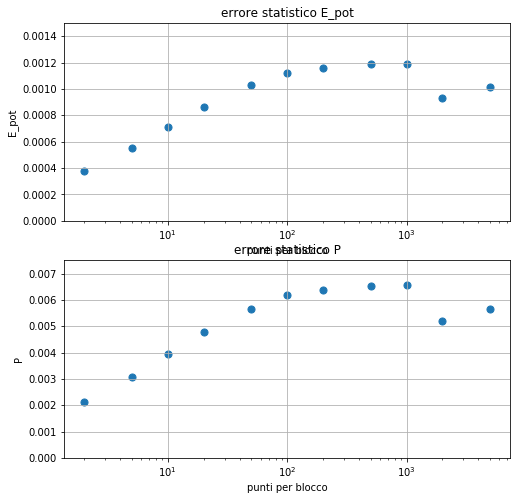

In [72]:
dim_blk = [2,5,10,20,50,100,200,500,1000,2000,5000]  
dim = len(dim_blk)
num_blk = np.zeros(dim)
for i in range(dim):
    num_blk[i] = N/dim_blk[i]

err = [np.zeros(dim), np.zeros(dim)]
for i in range(dim):
    ave_obs = [np.zeros(int(num_blk[i])), np.zeros(int(num_blk[i]))] #azzero 
    ave2 = np.zeros(2)                                                     
    ave = np.zeros(2)
    for l in range(2):
        for j in range(int(num_blk[i])):
            for k in range(int(j*dim_blk[i]), int((j+1)*dim_blk[i])):    
                ave_obs[l][j] += dati[l][k]/dim_blk[i]           #valor medio     
        for j in range(int(num_blk[i])):
            ave2[l] += (ave_obs[l][j]**2)/num_blk[i]          #media e varianza in blocco 
            ave[l] += ave_obs[l][j]/num_blk[i]                
        err[l][i] = np.sqrt((ave2[l] - ave[l]**2)/num_blk[i])  #aggiorno 

f = plt.figure(figsize = (8, 8))   
text = ['E_pot', 'P']
for i in range(2):
    f.add_subplot(2, 1, 1+i)          
    plt.scatter((dim_blk), err[i], s = 50)
    plt.xscale('log')
    plt.ylim(0, 0.0015*(4*i+1))
    plt.xlabel('punti per blocco')
    plt.ylabel(text[i])
    plt.title('errore statistico ' + text[i])
    plt.grid()    

come vediamo abbiamo una essenziale saturazione degli errori intorno al centinaio di punti per blocco, in accordo con quanto visto per i tempi di autocorrelazione.

###  Argon e Krypton
Riportiamo di seguito i risultati della simulazione

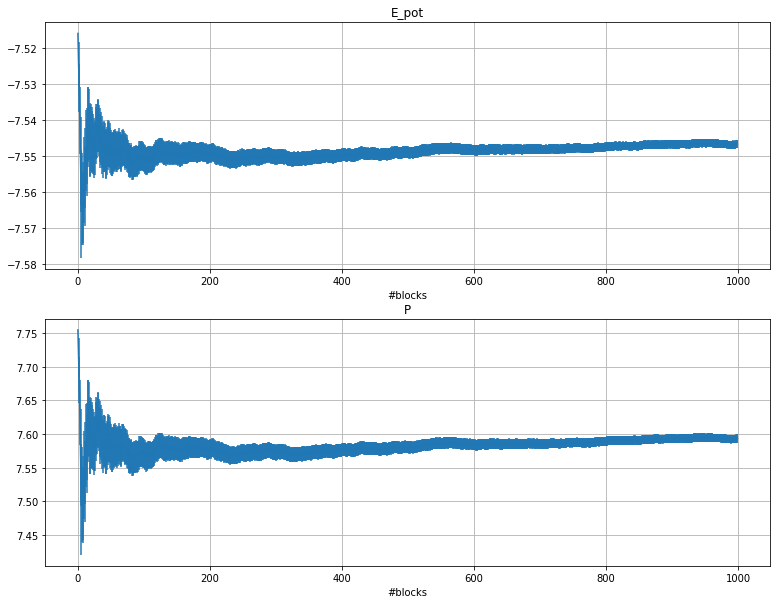

In [73]:
d = 100
num = 10**5//d
ave_blk = np.zeros(2)
c = np.zeros(2)
c2 = np.zeros(2)

ave = [np.zeros(num), np.zeros(num)]
ave2 = [np.zeros(num), np.zeros(num)]
devstd = [np.zeros(num), np.zeros(num)]

t = np.arange(num)
for j in range(2):
    for i in range(num):
        ave_blk = [0,0]
        for k in range(i*d, (i+1)*d):    
            ave_blk[j] += dati[j][k]/d          #calcolo il valor medio     
        c[j] += ave_blk[j]
        c2[j] += ave_blk[j]**2
        ave[j][i] = c[j]/(i+1)
        devstd[j][i] = np.sqrt((c2[j]/(i+1) - (c[j]/(i+1))**2)/(i+1))  

f = plt.figure(figsize = (13, 10))   
text = ['E_pot', 'P']
for i in range(2):
    f.add_subplot(2, 1, 1+i)          
    plt.errorbar(t, ave[i], devstd[i])
    plt.xlabel('#blocks')
    plt.title(text[i])
    plt.grid()


# $g(r)$

$N = 4000$ step e 20 blocchi. 


La distanza massima tra le particelle viene suddivisa in $100$ intervallini che ci permettono di istogrammare istante per istante le distanze, la media di blocco di questi istogrammi è la stima per g. 

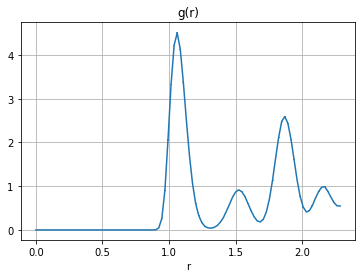

In [74]:
r, gdr, err_gdr = np.loadtxt("g/out_g.dat",unpack=True)
plt.errorbar(r, gdr, err_gdr, label = text[i])
plt.title('g(r)')
plt.xlabel('r')
plt.grid()
